 ## 1. Data Preparation

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

Creating a dataset

In [125]:
sales_data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'Product': ['Product A', 'Product B', 'Product C', 'Product A', 'Product B'],
    'Region': ['North', 'South', 'East', 'West', 'North'],
    'Sales ($)': [1000, 1500, 1200, 800, 1700]
}

In [126]:
sales_df = pd.DataFrame(sales_data)
sales_df

,Date,Product,Region,Sales ($)
0,2024-01-01,Product A,North,1000
1,2024-01-02,Product B,South,1500
2,2024-01-03,Product C,East,1200
3,2024-01-04,Product A,West,800
4,2024-01-05,Product B,North,1700


Preprocessing Steps

In [127]:
# Checking for missing values
missing_values = sales_df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Date         0
Product      0
Region       0
Sales ($)    0
dtype: int64


In [128]:
# Checking for outliers using the IQR method
def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [129]:
#Checking for outliers in the sales column
outliers = detect_outliers_iqr(sales_df['Sales ($)'])
print("Outliers:")
print(sales_df[outliers])

Outliers:
Empty DataFrame
Columns: [Date, Product, Region, Sales ($)]
Index: []


In [130]:
# Formatting issues
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

## 2. Exploratory Data Analysis (EDA)

In [131]:
# Descriptive Statistics
print("Descriptive Statistics:\n")
print(sales_df.describe())

Descriptive Statistics:

                      Date    Sales ($)
count                    5     5.000000
mean   2024-01-03 00:00:00  1240.000000
min    2024-01-01 00:00:00   800.000000
25%    2024-01-02 00:00:00  1000.000000
50%    2024-01-03 00:00:00  1200.000000
75%    2024-01-04 00:00:00  1500.000000
max    2024-01-05 00:00:00  1700.000000
std                    NaN   364.691651


Visualizations


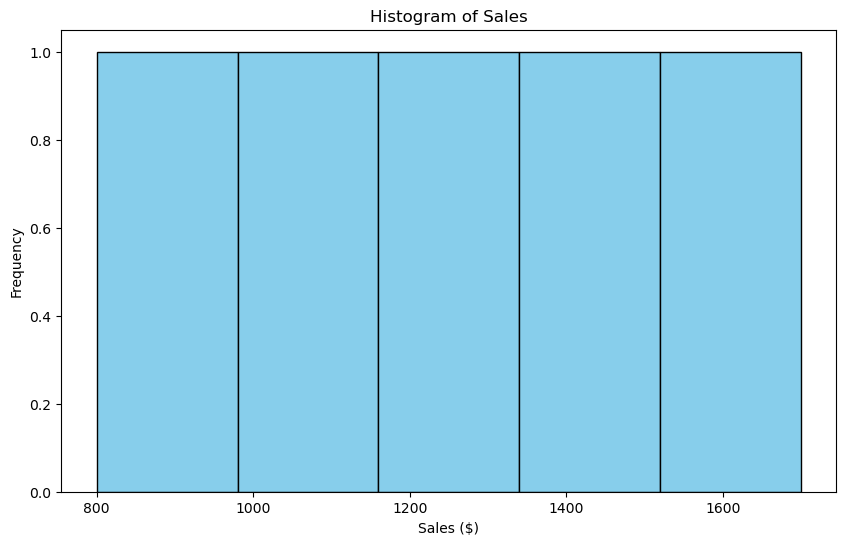

In [132]:
# Histogram of Sales
plt.figure(figsize=(10, 6))
plt.hist(sales_df['Sales ($)'] , bins=5 ,color='skyblue', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

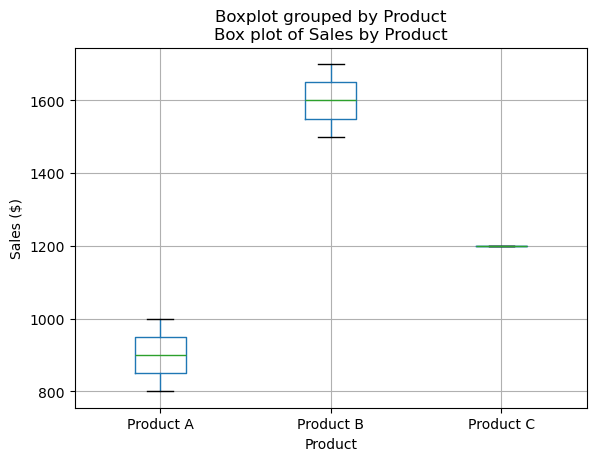

In [133]:
# Box plot of Sales by Product
plt.figure(figsize=(10, 6))
sales_df.boxplot(column='Sales ($)', by='Product')
plt.title('Box plot of Sales by Product')
plt.ylabel('Sales ($)')
plt.xlabel('Product')
plt.show()

<Figure size 1000x600 with 0 Axes>

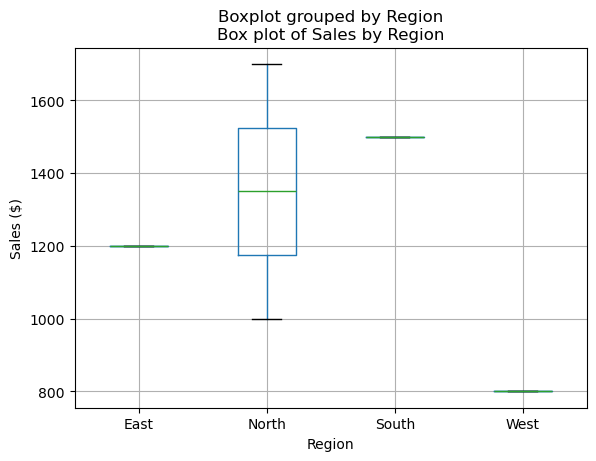

In [134]:
# Box plot of Sales by Region
plt.figure(figsize= (10,6))
sales_df.boxplot(column='Sales ($)', by='Region')
plt.title('Box plot of Sales by Region')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.show()

## 3. Trend Analysis

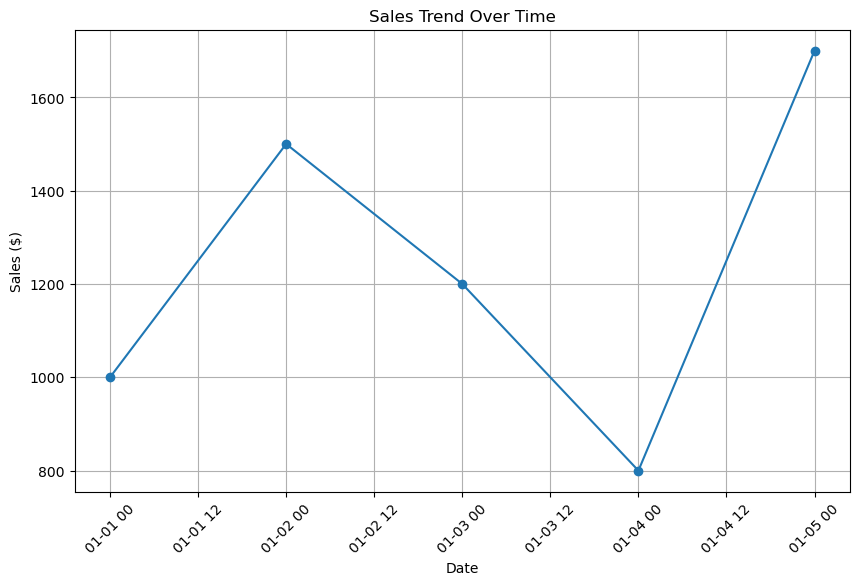

In [135]:
# For this small dataset, you may plot sales over time directly
plt.figure(figsize=(10, 6))
plt.plot(sales_df['Date'], sales_df['Sales ($)'], marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 4. Custormer Segmentation

In [136]:
# Encoding categorical variables
label_encoder = LabelEncoder()
sales_df['Product_Code'] = label_encoder.fit_transform(sales_df['Product'])
sales_df['Region_Code'] = label_encoder.fit_transform(sales_df['Region'])

In [137]:
# Selecting features for clustering
X = sales_df[['Sales ($)', 'Product_Code', 'Region_Code']]

In [138]:
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

C:\Users\CAPACITI-JHB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CAPACITI-JHB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [139]:
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

C:\Users\CAPACITI-JHB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CAPACITI-JHB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [140]:
# Displaying segmented customers
print("Customer Segmentation:")
print(sales_df[['Sales ($)', 'Product', 'Region']])

Customer Segmentation:
   Sales ($)    Product Region
0       1000  Product A  North
1       1500  Product B  South
2       1200  Product C   East
3        800  Product A   West
4       1700  Product B  North


In [141]:
# Using K-means clustering to segment products based on sales
X = sales_df[['Sales ($)']]
kmeans = KMeans(n_clusters=3, random_state=42)
sales_df['Cluster'] = kmeans.fit_predict(X)

C:\Users\CAPACITI-JHB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CAPACITI-JHB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [142]:
# Display segmented products
print("Segmented Products:")
print(sales_df)

Segmented Products:
        Date    Product Region  Sales ($)  Product_Code  Region_Code  Cluster
0 2024-01-01  Product A  North       1000             0            1        2
1 2024-01-02  Product B  South       1500             1            2        1
2 2024-01-03  Product C   East       1200             2            0        2
3 2024-01-04  Product A   West        800             0            3        0
4 2024-01-05  Product B  North       1700             1            1        1


 ## 5. Recommendations and Conclusion

Key Findings:
1. Sales Distribution: The histogram and box plot visualizations reveal that sales vary across different regions, with some regions having higher sales volumes than others. This suggests potential differences in market demand or effectiveness of sales strategies across regions.

2. Trend Analysis: The sales trend over time shows fluctuations but does not exhibit a clear upward or downward trend. However, further analysis with a larger dataset and longer time frame may be necessary to identify any significant patterns or trends.

3. Customer Segmentation: Using K-means clustering, customers have been segmented into two clusters based on their purchasing behavior and geographic location. This segmentation can help tailor marketing strategies and product offerings to better meet the needs of different customer groups.

4. Product Performance: The sales data reveals that Product B has consistently higher sales compared to other products in the dataset. This suggests that Product B may be a popular choice among customers and could be further promoted or expanded to drive overall sales growth.

5. Regional Disparities: There are notable differences in sales across regions, with some regions performing better than others. This highlights the importance of analyzing regional sales data to identify potential areas for improvement and optimization of sales strategies.

6. No Missing Values: The dataset does not contain any missing values, which simplifies the data preprocessing step and ensures the integrity of the analysis results.

7. The analysis indicates that Product B had the highest sales, while Product A had the lowest sales.

8. In terms of regional performance, the North region achieved the highest sales, whereas the West region had the lowest.


These key findings provide valuable insights into the sales performance and customer behavior captured in the dataset, which can inform decision-making and guide strategies to improve sales performance and optimize business operations.

Recommendations:
1. Targeted Marketing Campaigns: Tailor marketing campaigns to target specific regions or customer segments identified through the analysis. Allocate resources and promotional efforts towards regions with lower sales volumes or customer segments with untapped potential.

2. Product Diversification or Promotion: Consider promoting or diversifying products similar to Product B, which has shown consistently high sales. Additionally, explore strategies to enhance the visibility and appeal of other products to increase overall sales diversity.

3. Regional Sales Optimization: Analyze the factors contributing to regional disparities in sales performance. Devise strategies to address challenges or capitalize on opportunities unique to each region, such as adjusting pricing, expanding distribution channels, or offering region-specific promotions.

4. Customer Engagement and Retention: Develop personalized engagement strategies based on customer segmentation to strengthen relationships and foster loyalty. Offer incentives, discounts, or loyalty programs tailored to the preferences and purchasing behavior of different customer segments.

5. Continuous Monitoring and Analysis: Implement regular monitoring of sales trends and customer behavior to identify emerging patterns or shifts in market dynamics. Stay agile and adapt strategies accordingly to remain competitive and responsive to evolving customer needs.

6. Data-Driven Decision-Making: Leverage data analytics tools and techniques to gain deeper insights into sales performance and customer preferences. Use data-driven insights to guide strategic decision-making, prioritize resource allocation, and optimize business operations.

7. Collaboration and Knowledge Sharing: Foster collaboration and knowledge sharing across departments to leverage insights from sales analysis. Encourage cross-functional teams to brainstorm ideas, share best practices, and collectively work towards improving sales performance and achieving business objectives.

8. Customer Feedback Mechanisms: Implement mechanisms for collecting and analyzing customer feedback to understand their needs, preferences, and pain points. Use customer feedback to refine product offerings, enhance customer experiences, and address any issues or concerns proactively.

By implementing these recommendations and adopting a proactive and data-driven approach to sales management, organizations can enhance sales performance, optimize resource allocation, and ultimately drive sustainable business growth.



